In [1]:
import pandas as pd

ratings_df = pd.read_csv("Dataset/ratings_splits/temporal_global/filtered/train.csv") 

ratings_df_cleaned = ratings_df.drop(columns=['RatingID', 'Date', 'Vintage']).rename(columns={'WineID': 'item', 'UserID': 'user', 'Rating': 'rating'})

display(ratings_df_cleaned.head(10))

,user,item,rating
0,1173759,111415,5.0
1,1075841,111431,5.0
2,1225931,111431,5.0
3,1197513,111415,5.0
4,1173759,135885,5.0
5,1089224,111478,4.5
6,1174133,112229,5.0
7,1141874,111478,5.0
8,1203892,113240,5.0
9,1396037,102547,3.0


In [2]:
wines_df = pd.read_csv('Dataset/last/Xwines_Slim_1K_wines.csv')
wines_df['WineID'] = wines_df.index

In [3]:
print(wines_df.columns)

Index(['WineID', 'WineName', 'Type', 'Elaborate', 'Grapes', 'Harmonize', 'ABV',
       'Body', 'Acidity', 'Code', 'Country', 'RegionID', 'RegionName',
       'WineryID', 'WineryName', 'Website', 'Vintages'],
      dtype='object')


,UserID
WineID,
100001,289
100002,4
100003,8
100005,10
100007,10
...,...
199408,2
199481,1
199533,3


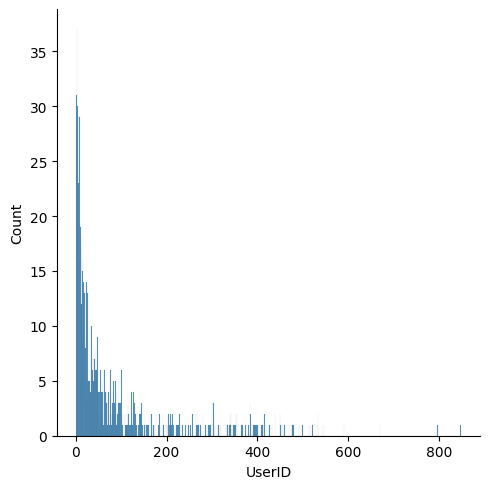

In [4]:
import seaborn as sns

count_ratings_df = ratings_df[['UserID','WineID']].groupby(['WineID']).count()
display(count_ratings_df)
sns.displot(data=count_ratings_df, x='UserID', binwidth=1)

,index,WineID,UserID
0,0,167418,848
1,1,167419,796
2,2,179012,670
3,3,155308,590
4,4,193478,546
...,...,...,...
980,980,150820,1
981,981,185917,1
982,982,186079,1
983,983,106091,1


<Axes: xlabel='index', ylabel='UserID'>

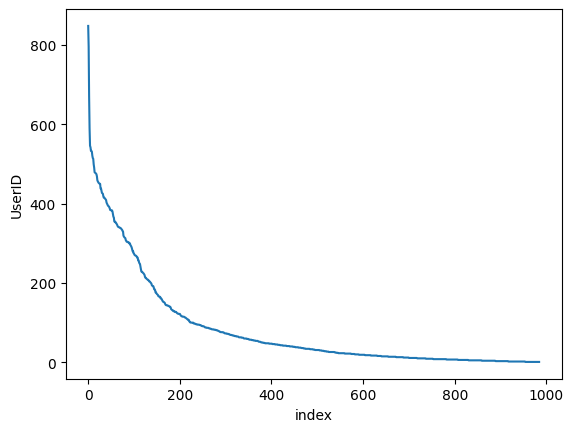

In [5]:
count_ratings_df_ord = count_ratings_df.sort_values(by="UserID", ascending=False).reset_index().reset_index()
display(count_ratings_df_ord)
sns.lineplot(data=count_ratings_df_ord, x='index', y='UserID')

In [6]:
users_ratings = ratings_df_cleaned.groupby(['user']).count()

selected = users_ratings['rating'] > 20
selected_users = users_ratings.loc[selected]
random_selected = selected_users.sample() 
select_column_df = random_selected.reset_index()['user'] 
selected_user = select_column_df.iloc[0]
print("Selected user: " + str(selected_user))

Selected user: 1100007


In [7]:
from lenskit.algorithms import Recommender
from lenskit.algorithms.user_knn import UserUser


num_recs = 10  
user_user = UserUser(15, min_nbrs=3)  
recsys = Recommender.adapt(user_user)
recsys.fit(ratings_df_cleaned)

Numba is using threading layer omp - consider TBB
found 1 potential runtime problems - see https://boi.st/lkpy-perf


In [8]:
selected_wines_useruser = recsys.recommend(selected_user, 10)
display(selected_wines_useruser)

,item,score
0,144337,5.505212
1,174184,4.541092
2,105004,4.524138
3,112084,4.481094
4,140819,4.478513
5,113321,4.474796
6,155628,4.347056
7,183379,4.331678
8,183229,4.326180
9,192584,4.324741


In [9]:
import pandas as pd

ratings_df_test = pd.read_csv("Dataset/ratings_splits/temporal_global/filtered/test.csv") 

# Remove the 'Date' and 'RatingID' columns and rename 'WineID' to 'Item' and 'UserID' to 'User'
ratings_df_cleaned_test = ratings_df_test.drop(columns=['RatingID', 'Date', 'Vintage']).rename(columns={'WineID': 'item', 'UserID': 'user', 'Rating': 'rating'})

# Display the first 10 rows of the modified DataFrame
# display(ratings_df_cleaned_test.head(10))

In [10]:
selected_wines_useruser = recsys.recommend(selected_user, 1001)
display(selected_wines_useruser)

,item,score
0,144337,5.505212
1,174184,4.541092
2,105004,4.524138
3,112084,4.481094
4,140819,4.478513
...,...,...
564,106867,2.595933
565,193941,2.590015
566,176112,2.588886
567,112732,2.170536


In [11]:
wine_row = ratings_df_cleaned_test[ratings_df_cleaned_test['user'] == selected_user]
print(wine_row)

          user    item  rating
7382   1100007  135922     3.5
12642  1100007  193552     3.5
13593  1100007  192503     4.5
15663  1100007  192584     4.0
20366  1100007  112861     4.0
21279  1100007  112948     4.0
22038  1100007  192515     4.0
24060  1100007  111645     3.5


In [12]:
wine_row_2 = selected_wines_useruser[selected_wines_useruser['item'] == 111433]
print(wine_row_2)

      item     score
82  111433  3.899823


In [13]:
from lenskit.algorithms import Recommender
from lenskit.algorithms.item_knn import ItemItem


num_recs = 10  
itemitem = ItemItem(15, min_nbrs=3)  
recsys_item = Recommender.adapt(itemitem)
recsys_item.fit(ratings_df_cleaned)

C:\Users\emmxc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\lenskit\algorithms\item_knn.py:119: NumbaTypeSafetyWarning: unsafe cast from uint64 to int64. Precision may be lost.
  b = blocks[bi]


In [14]:
selected_wines_itemitem = recsys_item.recommend(selected_user, 1001)
display(selected_wines_itemitem)

,item,score
0,181280,5.020971
1,182711,4.881453
2,179855,4.815718
3,115984,4.804241
4,182081,4.780316
...,...,...
710,193719,2.587471
711,142975,2.546068
712,164987,2.525575
713,174466,2.505805


In [15]:
wine_row = ratings_df_cleaned_test[ratings_df_cleaned_test['user'] == selected_user]
print(wine_row)

          user    item  rating
7382   1100007  135922     3.5
12642  1100007  193552     3.5
13593  1100007  192503     4.5
15663  1100007  192584     4.0
20366  1100007  112861     4.0
21279  1100007  112948     4.0
22038  1100007  192515     4.0
24060  1100007  111645     3.5


In [16]:
wine_row_item = selected_wines_itemitem[selected_wines_itemitem['item'] == 100067]
print(wine_row_item)

       item     score
162  100067  3.944656


EVALUATION OF INDIVIDUAL RECOMMENDER SYSTEM

Root Mean Squared Error (RMSE): to evaluate accuracy of rating predictions

For a recommender system, an RMSE of around 0.5 to 1.5 on a 5-star rating scale is considered reasonable, depending on the system's complexity.

We use the RMSE because we get a non-discrete rating so we calculate distances. And RMSE get a penalty if you are far from the rating so we chose it to have very accurate evaluation. It is particularly useful when you're making predictions on a continuous scale, like in this case where we're predicting wine ratings (e.g., from 1 to 5).

User-User Collaborative Filtering (User-User KNN) for the first user

In [17]:
from sklearn.metrics import mean_squared_error
import numpy as np

selected_wines_useruser = recsys.recommend(selected_user, 1001)  # User-User

wine_row = ratings_df_cleaned_test[ratings_df_cleaned_test['user'] == selected_user]

actual_ratings = wine_row[['item', 'rating']]  # Actual ratings by user from test set
predicted_ratings_useruser = selected_wines_useruser[selected_wines_useruser['item'].isin(actual_ratings['item'])]

# Merge actual and predicted ratings for comparison
merged_useruser = pd.merge(actual_ratings, predicted_ratings_useruser, on='item', how='inner')
print(merged_useruser)

# RMSE for User-User KNN
rmse_useruser = np.sqrt(mean_squared_error(merged_useruser['rating'], merged_useruser['score']))
print(f'RMSE for User-User KNN: {rmse_useruser}')


     item  rating     score
0  193552     3.5  3.417490
1  192503     4.5  3.430812
2  192584     4.0  4.324741
3  112948     4.0  3.736327
4  192515     4.0  3.242258
5  111645     3.5  3.589199
RMSE for User-User KNN: 0.5637789193033876


Item-Item Collaborative Filtering (Item-Item KNN) for the first user

In [18]:
selected_wines_itemitem = recsys_item.recommend(selected_user, 1001)  # Item-Item

wine_row = ratings_df_cleaned_test[ratings_df_cleaned_test['user'] == selected_user]

predicted_ratings_itemitem = selected_wines_itemitem[selected_wines_itemitem['item'].isin(actual_ratings['item'])]

# Merge actual and predicted ratings for comparison
merged_itemitem = pd.merge(actual_ratings, predicted_ratings_itemitem, on='item', how='inner')
print(merged_itemitem)

# RMSE for Item-Item KNN
rmse_itemitem = np.sqrt(mean_squared_error(merged_itemitem['rating'], merged_itemitem['score']))
print(f'RMSE for Item-Item KNN: {rmse_itemitem}')

     item  rating     score
0  135922     3.5  3.469114
1  193552     3.5  3.602761
2  192503     4.5  3.719623
3  192584     4.0  3.624963
4  112861     4.0  3.702843
5  112948     4.0  3.290862
6  192515     4.0  3.589096
7  111645     3.5  3.640483
RMSE for Item-Item KNN: 0.43887797086810526


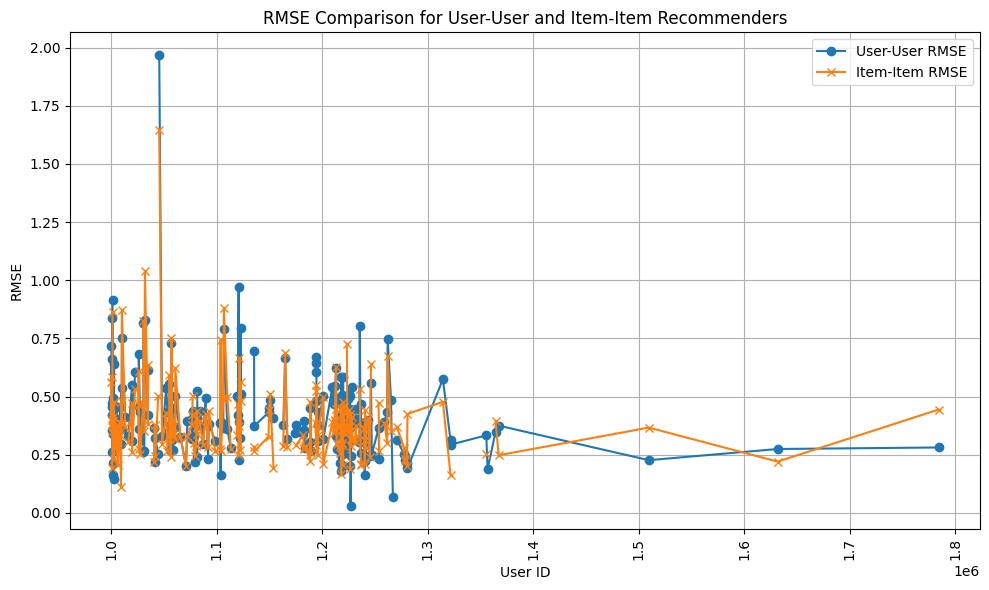

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Select users who have ratings in the test set
users_ratings_test = ratings_df_cleaned_test.groupby('user').count()
selected_users = users_ratings_test[users_ratings_test['rating'] > 1].index.tolist()  # Users with more than 10 ratings

# Initialize lists to store RMSE values
rmse_useruser_list = []
rmse_itemitem_list = []

# Loop through the selected users and calculate RMSE for each model
for selected_user in selected_users:
    # Get actual ratings for the user from the test set
    actual_ratings = ratings_df_cleaned_test[ratings_df_cleaned_test['user'] == selected_user][['item', 'rating']]

    # Get predictions from User-User model
    predicted_useruser = recsys.recommend(selected_user, 1000)
    merged_useruser = pd.merge(actual_ratings, predicted_useruser, on='item', how='inner')
    
    if len(merged_useruser) > 0:
        rmse_useruser = np.sqrt(mean_squared_error(merged_useruser['rating'], merged_useruser['score']))
    else:
        rmse_useruser = np.nan  # In case no predictions were found for this user
    
    # Get predictions from Item-Item model
    predicted_itemitem = recsys_item.recommend(selected_user, 1000)
    merged_itemitem = pd.merge(actual_ratings, predicted_itemitem, on='item', how='inner')
    
    if len(merged_itemitem) > 0:
        rmse_itemitem = np.sqrt(mean_squared_error(merged_itemitem['rating'], merged_itemitem['score']))
    else:
        rmse_itemitem = np.nan  # In case no predictions were found for this user

    # Store the RMSE values
    rmse_useruser_list.append(rmse_useruser)
    rmse_itemitem_list.append(rmse_itemitem)

# Convert the lists to DataFrames
rmse_df = pd.DataFrame({
    'user': selected_users,
    'rmse_useruser': rmse_useruser_list,
    'rmse_itemitem': rmse_itemitem_list
})

# Plot the RMSE values for User-User and Item-Item models
plt.figure(figsize=(10, 6))
plt.plot(rmse_df['user'], rmse_df['rmse_useruser'], label='User-User RMSE', marker='o')
plt.plot(rmse_df['user'], rmse_df['rmse_itemitem'], label='Item-Item RMSE', marker='x')
plt.xlabel('User ID')
plt.ylabel('RMSE')
plt.title('RMSE Comparison for User-User and Item-Item Recommenders')
plt.legend()
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()


Precision@K and Recall@K: 
These metrics help evaluate how well the system ranks items in the top K recommendations, which is crucial for our individual recommendation systems

Tried to implement these, but would get very bad scored while the RMSE indicates a good system. I think its is because:
- Data sparsity
- Cold start problem

In [27]:
import numpy as np

def precision_at_k(recommended_items, relevant_items, k):
    """
    Calculate Precision@K for a user.
    
    Args:
    recommended_items: List of items recommended by the system.
    relevant_items: Set of relevant items (items rated > 3.0).
    k: Number of top recommendations (K).
    
    Returns:
    Precision@K score.
    """
    recommended_at_k = recommended_items[:k]
    relevant_at_k = set(recommended_at_k).intersection(relevant_items)
    precision = len(relevant_at_k) / k
    return precision

def recall_at_k(recommended_items, relevant_items, k):
    """
    Calculate Recall@K for a user.
    
    Args:
    recommended_items: List of items recommended by the system.
    relevant_items: Set of relevant items (items rated > 3.0).
    k: Number of top recommendations (K).
    
    Returns:
    Recall@K score.
    """
    recommended_at_k = recommended_items[:k]
    relevant_at_k = set(recommended_at_k).intersection(relevant_items)
    recall = len(relevant_at_k) / len(relevant_items) if relevant_items else 0
    return recall

def evaluate_recsys_at_k(recsys, test_df, k=10, min_ratings=10, relevant_threshold=3.0):
    """
    Evaluate recommendation system for Precision@K and Recall@K.
    
    Args:
    recsys: The recommender system object.
    test_df: Test dataframe with user-item interactions.
    k: The number of top recommendations (K).
    min_ratings: Minimum number of ratings for a user to be included.
    relevant_threshold: Rating threshold for relevant items (e.g., > 3.0).
    
    Returns:
    Average Precision@K and Recall@K for all users.
    """
    precision_list = []
    recall_list = []
    
    # Filter users with more than min_ratings
    user_ratings_count = test_df.groupby('user').size()
    eligible_users = user_ratings_count[user_ratings_count > min_ratings].index
    
    for user in eligible_users:
        # Get the items this user rated in the test set
        user_data = test_df[test_df['user'] == user]
        relevant_items = set(user_data[user_data['rating'] > relevant_threshold]['item'])
        
        if not relevant_items:
            continue  # Skip users with no relevant items
        
        # Get top K recommendations for this user
        recommended_items = recsys.recommend(user, k)['item'].tolist()
        
        # Calculate Precision@K and Recall@K
        precision_k = precision_at_k(recommended_items, relevant_items, k)
        recall_k = recall_at_k(recommended_items, relevant_items, k)
        
        precision_list.append(precision_k)
        recall_list.append(recall_k)
    
    # Return average Precision@K and Recall@K across all eligible users
    avg_precision = np.mean(precision_list)
    avg_recall = np.mean(recall_list)
    
    return avg_precision, avg_recall

# Example usage for your recommender system:
precision_k, recall_k = evaluate_recsys_at_k(recsys, ratings_df_cleaned_test, k=10)

print(f"Average Precision@10: {precision_k:.4f}")
print(f"Average Recall@10: {recall_k:.4f}")


Average Precision@10: 0.0221
Average Recall@10: 0.0176


Normalized Discounted Cumulative Gain (NDCG)
NDCG measures the effectiveness of a recommendation based on the positions of relevant items in the ranked list. Higher ranks for relevant items contribute more to the score.

Hppens the same as Precision and Recall

Standard Deviation User-User RMSE: 0.1883782248721945
Standard Deviation Item-Item RMSE: 0.1717282075316873


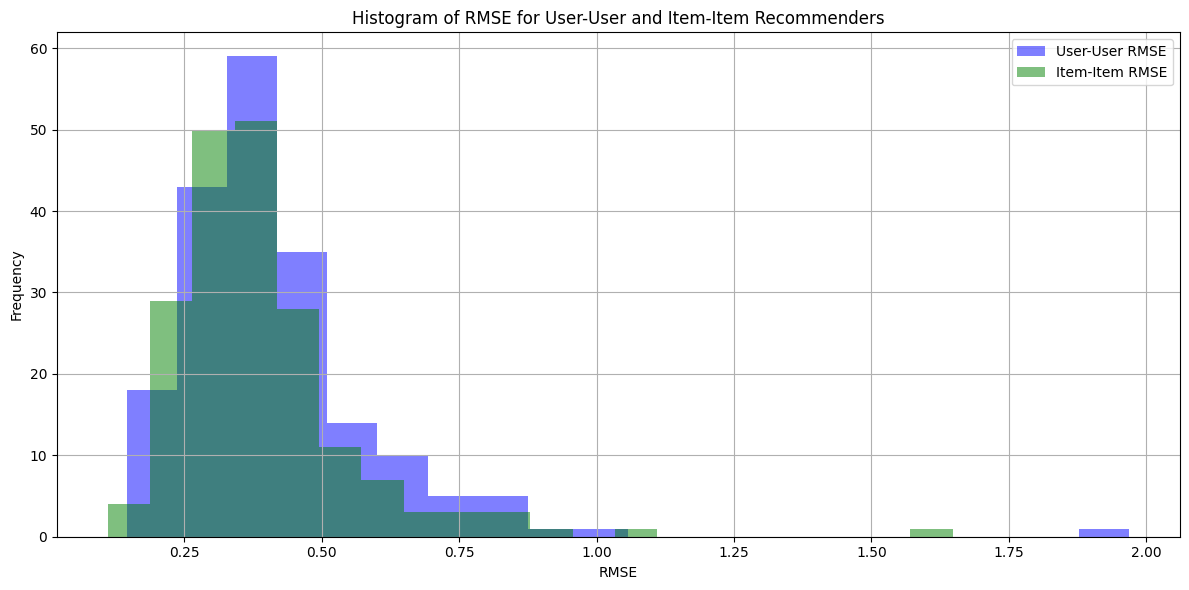

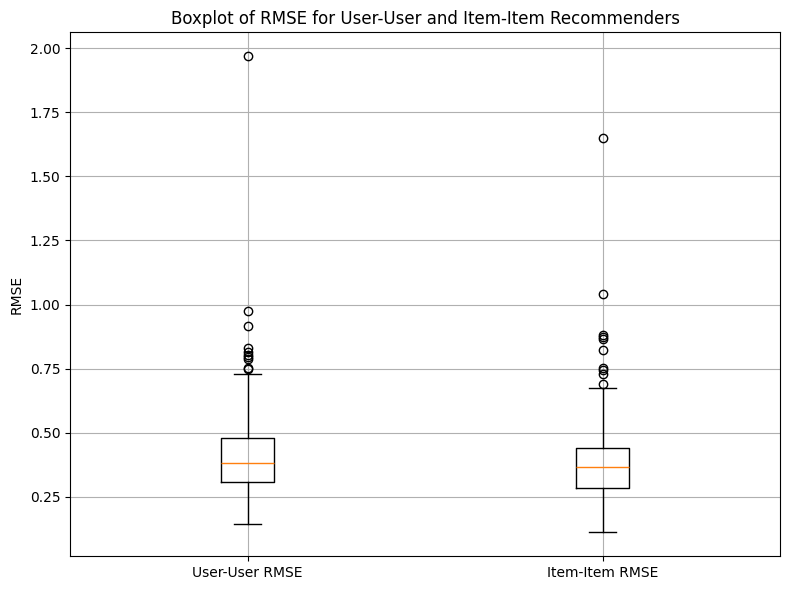

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming the rest of the code where rmse_useruser_list and rmse_itemitem_list are populated

# Convert the lists to DataFrames (already done in your original code)
rmse_df = pd.DataFrame({
    'user': selected_users,
    'rmse_useruser': rmse_useruser_list,
    'rmse_itemitem': rmse_itemitem_list
})

# Drop NaN values (if any) to avoid errors in the histogram and calculations
rmse_df_cleaned = rmse_df.dropna(subset=['rmse_useruser', 'rmse_itemitem'])

# 1. Standardabweichung berechnen
std_useruser = rmse_df_cleaned['rmse_useruser'].std()
std_itemitem = rmse_df_cleaned['rmse_itemitem'].std()

print(f"Standard Deviation User-User RMSE: {std_useruser}")
print(f"Standard Deviation Item-Item RMSE: {std_itemitem}")

plt.figure(figsize=(12, 6))

plt.hist(rmse_df_cleaned['rmse_useruser'], bins=20, alpha=0.5, label='User-User RMSE', color='blue')
plt.hist(rmse_df_cleaned['rmse_itemitem'], bins=20, alpha=0.5, label='Item-Item RMSE', color='green')

plt.xlabel('RMSE')
plt.ylabel('Frequency')
plt.title('Histogram of RMSE for User-User and Item-Item Recommenders')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
plt.boxplot([rmse_df_cleaned['rmse_useruser'], rmse_df_cleaned['rmse_itemitem']], 
            labels=['User-User RMSE', 'Item-Item RMSE'])

plt.ylabel('RMSE')
plt.title('Boxplot of RMSE for User-User and Item-Item Recommenders')
plt.grid(True)
plt.tight_layout()
plt.show()


In [21]:
def ndcg_at_k(recommended_items, relevant_items, k):
    recommended_at_k = recommended_items[:k]
    relevance = [1 if item in relevant_items else 0 for item in recommended_at_k]

    dcg = sum(rel / np.log2(idx + 1) for idx, rel in enumerate(relevance, start=1))
    
    ideal_relevance = sorted([1 if item in relevant_items else 0 for item in relevant_items], reverse=True)
    idcg = sum(rel / np.log2(idx + 1) for idx, rel in enumerate(ideal_relevance, start=1))
    
    ndcg = dcg / idcg if idcg > 0 else 0
    return ndcg

def calculate_ndcg_for_all_users(recsys, test_df, k):
    ndcg_scores = []
    
    for user in test_df['user'].unique():
        relevant_items = test_df[test_df['user'] == user]['item'].tolist()
        recommended_items = recsys.recommend(user, k)['item'].tolist()
        
        ndcg = ndcg_at_k(recommended_items, relevant_items, k)
        ndcg_scores.append(ndcg)
    
    return np.mean(ndcg_scores)

# Assuming recsys_user_user and recsys_item_item are your trained recommendation systems
K = 10  # Set K value for NDCG
ndcg_user_user = calculate_ndcg_for_all_users(recsys, ratings_df_cleaned_test, K)
ndcg_item_item = calculate_ndcg_for_all_users(recsys_item, ratings_df_cleaned_test, K)

print(f"NDCG@{K} for User-User: {ndcg_user_user}")
print(f"NDCG@{K} for Item-Item: {ndcg_item_item}")


NDCG@10 for User-User: 0.009831843131158086
NDCG@10 for Item-Item: 0.017600918444423946


USER COVERAGE

Evaluating user coverage in a recommendation system measures the proportion of users for whom the system can provide recommendations. It gives insights into how well the system serves its user base.

96.61% for User-User and 96.38% for Item-Item suggest that both recommendation systems are effectively serving nearly all users in your dataset. This indicates a well-performing system in terms of reach.


In [22]:
def calculate_user_coverage(recsys, test_df):
    total_users = test_df['user'].nunique()
    users_with_recommendations = 0
    
    for user in test_df['user'].unique():
        recommended_items = recsys.recommend(user, 1)  # Get at least 1 recommendation
        if not recommended_items.empty:
            users_with_recommendations += 1
    
    user_coverage = (users_with_recommendations / total_users) * 100
    return user_coverage

# Example usage for user-user and item-item recommendation systems
user_coverage_user_user = calculate_user_coverage(recsys, ratings_df_cleaned_test)
user_coverage_item_item = calculate_user_coverage(recsys_item, ratings_df_cleaned_test)

print(f"User Coverage for User-User: {user_coverage_user_user:.2f}%")
print(f"User Coverage for Item-Item: {user_coverage_item_item:.2f}%")


User Coverage for User-User: 96.61%
User Coverage for Item-Item: 96.38%


CATALOG COVERAGE

refers to the proportion or percentage of the total available items (in this case, wines) that are recommended to users over a given period

In [24]:
def calculate_catalog_coverage(recsys, test_df, item_catalog):
    total_items = len(item_catalog)  # Total number of items in the dataset (wine catalog)
    unique_recommended_items = set()  # To store all unique items recommended

    for user in test_df['user'].unique():
        recommended_items = recsys.recommend(user, 10)  # Get top-N recommendations for each user
        unique_recommended_items.update(recommended_items['item'].unique())  # Track unique items

    catalog_coverage = (len(unique_recommended_items) / total_items) * 100
    return catalog_coverage

wine_catalog = ratings_df_cleaned['item'].unique()  # Extract unique wine IDs
total_wines = len(wine_catalog)  # Total number of unique wines

# Example usage for user-user and item-item recommendation systems
catalog_coverage_user_user = calculate_catalog_coverage(recsys, ratings_df_cleaned_test, wine_catalog)
catalog_coverage_item_item = calculate_catalog_coverage(recsys_item, ratings_df_cleaned_test, wine_catalog)

print(f"Catalog Coverage for User-User: {catalog_coverage_user_user:.2f}%")
print(f"Catalog Coverage for Item-Item: {catalog_coverage_item_item:.2f}%")


Catalog Coverage for User-User: 38.27%
Catalog Coverage for Item-Item: 49.85%


The 40% catalog coverage shows a popularity bias for some type of wines. And there are other wines rarely rated so they dont show up as much